# **D-mart Product Analysis 📈**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [4]:
data = pd.read_csv('/content/DMart.csv')

In [5]:
data.head()

,Name,Brand,Price,DiscountedPrice,Category,SubCategory,Quantity,Description,BreadCrumbs
0,Premia Badam (Almonds),Premia,451.0,329.0,Grocery,Grocery/Dry Fruits,500 gm,India,Grocery > Grocery/Dry Fruits
1,Premia Badam (Almonds),Premia,109.0,85.0,Grocery,Grocery/Dry Fruits,100 gm,India,Grocery > Grocery/Dry Fruits
2,Premia Badam (Almonds),Premia,202.0,175.0,Grocery,Grocery/Dry Fruits,200 gm,India,Grocery > Grocery/Dry Fruits
3,Nutraj California Almonds (Badam),Nutraj,599.0,349.0,Grocery,Dry Fruits,500 gm,USA,Grocery > Dry Fruits
4,Nutraj California Almonds (Badam),Nutraj,1549.0,659.0,Grocery,Dry Fruits,1 kg,USA,Grocery > Dry Fruits


In [6]:
data.shape

(5189, 9)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5189 entries, 0 to 5188
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             5188 non-null   object 
 1   Brand            4789 non-null   object 
 2   Price            5188 non-null   float64
 3   DiscountedPrice  5188 non-null   float64
 4   Category         5186 non-null   object 
 5   SubCategory      5186 non-null   object 
 6   Quantity         5188 non-null   object 
 7   Description      5187 non-null   object 
 8   BreadCrumbs      5186 non-null   object 
dtypes: float64(2), object(7)
memory usage: 365.0+ KB


In [11]:
data.isnull().sum()

Name                 1
Brand              400
Price                1
DiscountedPrice      1
Category             3
SubCategory          3
Quantity             1
Description          2
BreadCrumbs          3
dtype: int64

In [12]:
data.describe()

,Price,DiscountedPrice
count,5188.000000,5188.000000
mean,344.030360,236.669719
std,601.034092,387.198716
min,0.000000,0.000000
25%,85.000000,64.000000
50%,175.000000,125.000000
75%,345.000000,249.000000
max,10990.000000,7999.000000


In [13]:
data['Brand'].unique()

array(['Premia', 'Nutraj', nan, 'Tata', 'Satyam', 'KMK',
       'DMart Healthy Choice', 'Tata Sampann', 'Kanji Manji Kothari',
       'ProV', 'Kalbavi', 'Kokan Gem', 'TATA', '24 Mantra Organic',
       'Organic Tattva', 'Nutrela', '24 Mantra', 'Carnival', 'Saffola',
       'Crown', 'Emperor', 'Falcon', 'Apis', 'King Solomon',
       'Royal Delight', 'Shamim', 'Candor', 'Mahafruit', 'Morya',
       'Keshar', 'Plain Jaggery', 'Laxmi', 'Miki', 'Fortune', 'Sunrich',
       'Gemini', 'Sunday', 'Swaad', 'Dhara', 'Nature Fresh', 'Dalda',
       'Sundrop', 'Sunny', 'Godrej', 'Aadhaar', 'Hudson', 'Svity Kolam',
       'RiSO', 'Ricela', 'Gulab', 'Guinea', 'RRO', 'RRO Primio',
       'Gramiyaa', 'Del Monte', 'Borges', 'Figaro', 'Leonardo',
       'Bertolli', 'Patanjali', 'Tez', 'Idhayam', 'KLF', 'Tilsona',
       'KPL Shudhi', 'Amul', 'Gowardhan', 'Aabad', 'Mother Dairy',
       'Sagar', 'Prabhat', 'Chitale Dairy', 'Dynamix', 'Govind',
       'Aashirvaad', 'Parsi Dairy Farm', 'Haribol', 'Organic 

In [23]:
data['Category'].unique()


array(['Grocery', 'Personal Care', 'Packaged Food', 'DMart Grocery',
       'Dairy & Beverages', 'Fruits & Vegetables', 'Home & Kitchen',
       'Specials', 'Kitchen Aprons', 'Appliances', 'Wonderchef',
       'Water Purifiers & Accessories', 'Tableware', 'Butterfly', nan,
       'Joyo Plastics', 'Geep', 'Zebronics', 'Beauty & Cosmetics',
       'Syska', 'Pigeon', 'Clothing & Accessories', 'School Supplies',
       'Backpacks', 'Computer Accessories', 'Plant Container',
       'Motorbike Helmets', 'Smartwatches', 'Raincoat', 'Baby & Kids'],
      dtype=object)

In [24]:
data['SubCategory'].unique()

array(['Grocery/Dry Fruits', 'Dry Fruits', 'Dals', 'Pulses',
       'Masala & Spices', 'Grocery/Salt / Sugar / Jaggery',
       'Ghee & Vanaspati', 'Grocery/Rice & Rice Products',
       'Grocery/Masala & Spices', 'Grocery/Flours & Grains',
       'Cooking Oil', 'Hair Care', 'Gourmet Food', 'Flours & Grains',
       'Rice & Rice Products', 'DMart Grocery/Rice & Rice Products',
       'Pickles', 'Salt / Sugar / Jaggery', 'Snacks & Farsans',
       'Beverages', 'DMart Grocery', 'Dairy', 'Biscuits & Cookies',
       'Bakery', 'Personal Care', 'Ready To Cook', 'Breakfast Cereals',
       'Packaged Food', 'Sweets', 'Ketchup & Sauce', 'Jams & Spreads',
       'Pasta & Noodles', 'Fruits & Vegetables',
       'Detergent & Fabric Care', 'Cleaners', 'Specials',
       'Home & Kitchen', 'Cleaning Tools', 'Freshener & Repellents',
       'Bed & Bath', 'Furniture & Décor', 'Disinfectants',
       'Tissue Paper & Napkins', 'Home & Kitchen/Tissue Paper & Napkins',
       'Kitchen Aprons', 'Home Appli

In [15]:
data['Quantity'].unique()

array(['500 gm', '100 gm', '200 gm', '1 kg', '400 gm', '5 kg', '250 gm',
       '1 Kg', '150 gm', '450 gm', '50 gm', '1 L', '900 gm', '20 gm',
       '10 gm', '4 pcs', '5 L', '15 L', '5  L', '500 ml', '2 L', '200 ml',
       '250 ml', '2x1L', '225 ml', '10 kg', '5 Kg', ' 5 kg', '25 gm',
       '350 gm', '72 gm', ' 50 gm', '35 gm', '60 gm', '120 gm', '80 gm',
       '5 U', '40 gm', '700 gm', '1 gm', '45 gm', '7 gm', '75 gm',
       '20 ml', '1.5 kg', '25 Bags', '100 Bags', '10 Bags', '50 Bags',
       '140 gm', '168 gm', '16 Bags', '180 ml', '1 L x 12 U', '476 gm',
       '750 gm', '663 gm', '600 gm', '180 gm', '160 gm', '20 Bag',
       '2x500 gm', '95 gm', '48 gm', '5x65 ml', '380 gm', '10 U',
       '150 ml', '85 gm', '90 gm', '225 gm', '2.25 L', '600 ml', '1.75 L',
       '8x250 ml', '750 ml', '300 ml', '6x330 ml', '330 ml', '750  ml',
       '1.2 L', '6x250 ml', '4x250 ml', '350 ml', '623 gm', '253 gm',
       '143 gm', '584 gm', '4X100 gm', '300 gm', '138 gm', '276 gm',
       '12

In [20]:
data['Description'].unique()[:2]

array(['India', 'USA'], dtype=object)

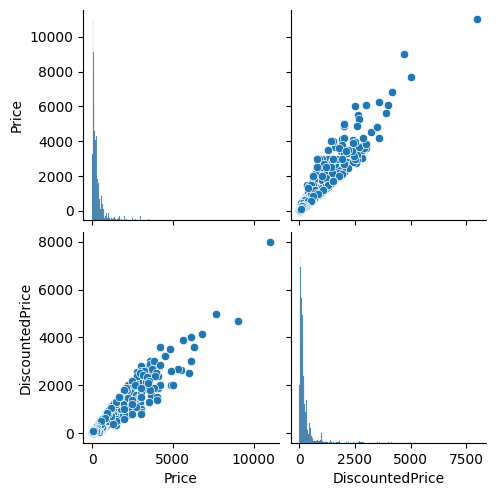

In [25]:
sns.pairplot(data)

In [26]:
data['Brand'].fillna('Missing', inplace=True)

In [27]:
data['Category'].value_counts()

Personal Care                    1234
Packaged Food                    1125
Home & Kitchen                    880
Grocery                           840
Dairy & Beverages                 429
Specials                          187
Clothing & Accessories             97
Fruits & Vegetables                78
School Supplies                    69
Appliances                         53
Beauty & Cosmetics                 46
Raincoat                           33
DMart Grocery                      31
Plant Container                    23
Tableware                          18
Backpacks                          13
Zebronics                           5
Motorbike Helmets                   4
Baby & Kids                         4
Geep                                3
Kitchen Aprons                      3
Butterfly                           2
Computer Accessories                2
Joyo Plastics                       2
Pigeon                              1
Syska                               1
Water Purifi

In [29]:
data['SubCategory'].value_counts().head(10)

Snacks & Farsans     302
Beverages            282
Skin Care            222
Masala & Spices      204
Hair Care            160
Specials             157
Bed & Bath           150
Dairy                147
Packaged Food        135
Health & Wellness    129
Name: SubCategory, dtype: int64

In [30]:
data['BreadCrumbs'].value_counts().head(10)

Packaged Food > Snacks & Farsans     291
Dairy & Beverages > Beverages        282
Grocery > Masala & Spices            204
Personal Care > Skin Care            203
Personal Care > Hair Care            160
Specials                             157
Dairy & Beverages > Dairy            147
Home & Kitchen > Bed & Bath          136
Packaged Food                        135
Personal Care > Health & Wellness    129
Name: BreadCrumbs, dtype: int64

In [31]:
data['Name'].value_counts().head(5)

Elle 18 Nail Pops Nail Colour - Shade 39                   7
Trident CF Hand Towel 380 GSM - Tango Tomato - 40x60 cm    5
Whisper Bindazzz Nights XL +                               5
Feather Soft Black Ankle Length Legging - 1 Unit           5
Colgate Dental Cream Strong Teeth Toothpaste               5
Name: Name, dtype: int64

<Axes: >

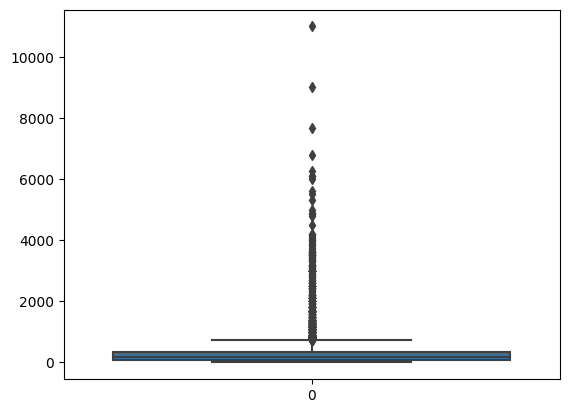

In [43]:
sns.boxplot(data['Price'])

<Axes: >

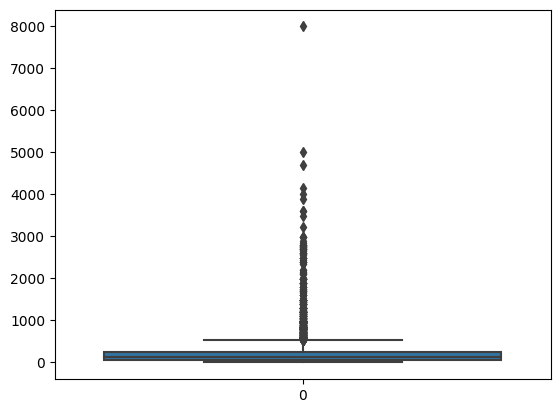

In [41]:
sns.boxplot(data['DiscountedPrice'])

<Axes: >

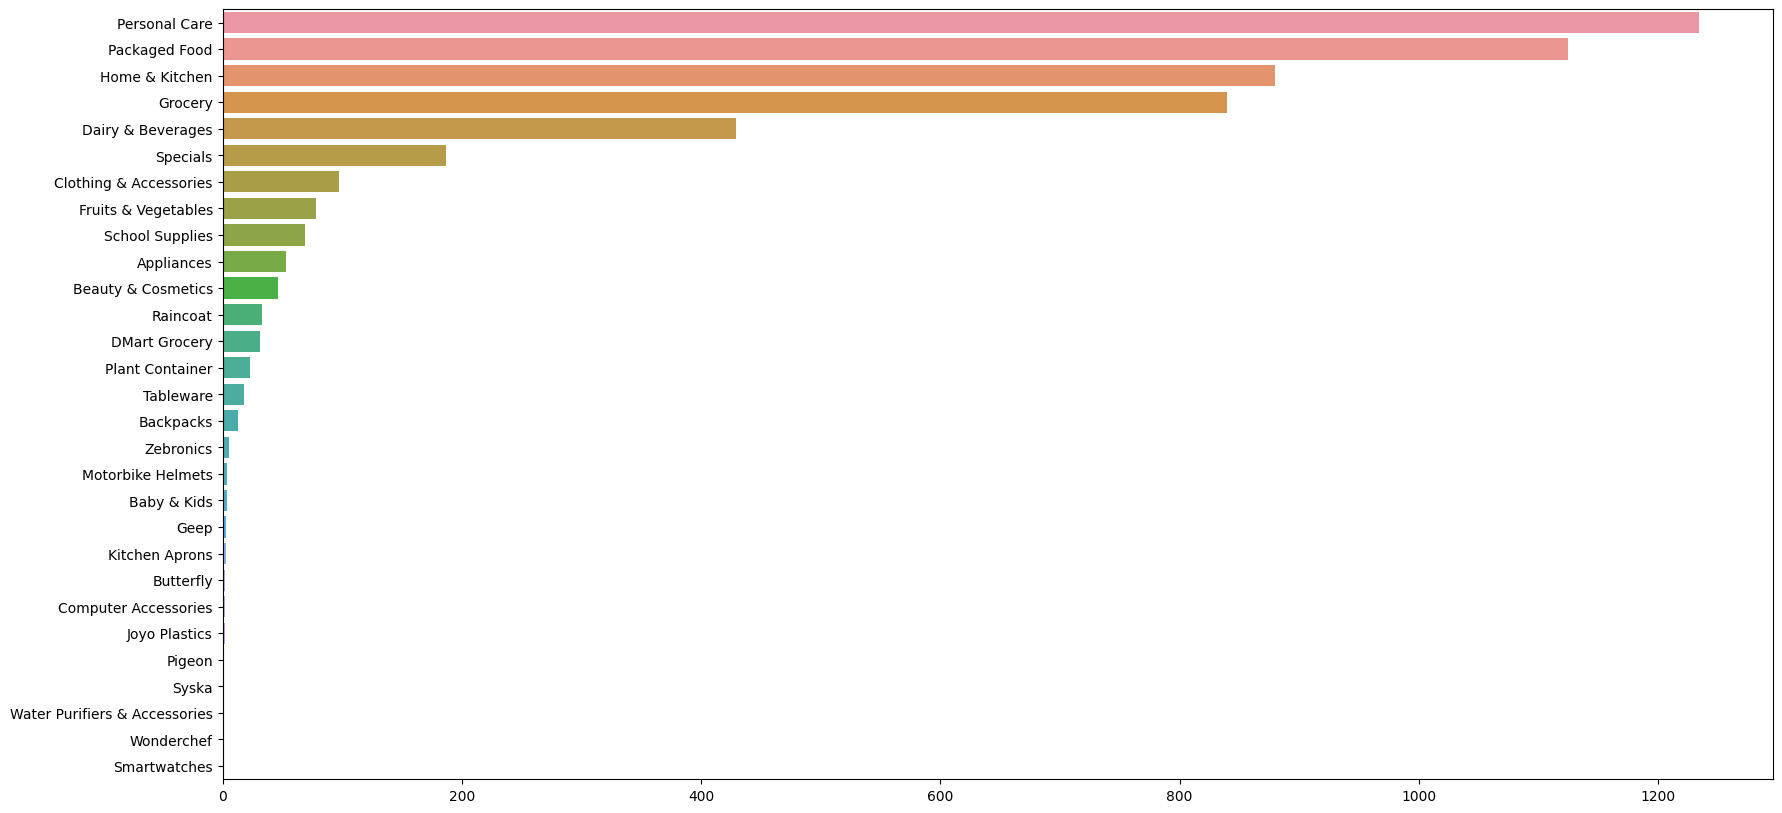

In [47]:
plt.figure(figsize=(20,10))
sns.barplot(x = data['Category'].value_counts().values , y =  data['Category'].value_counts().index ,  linewidth=5 )

<Axes: >

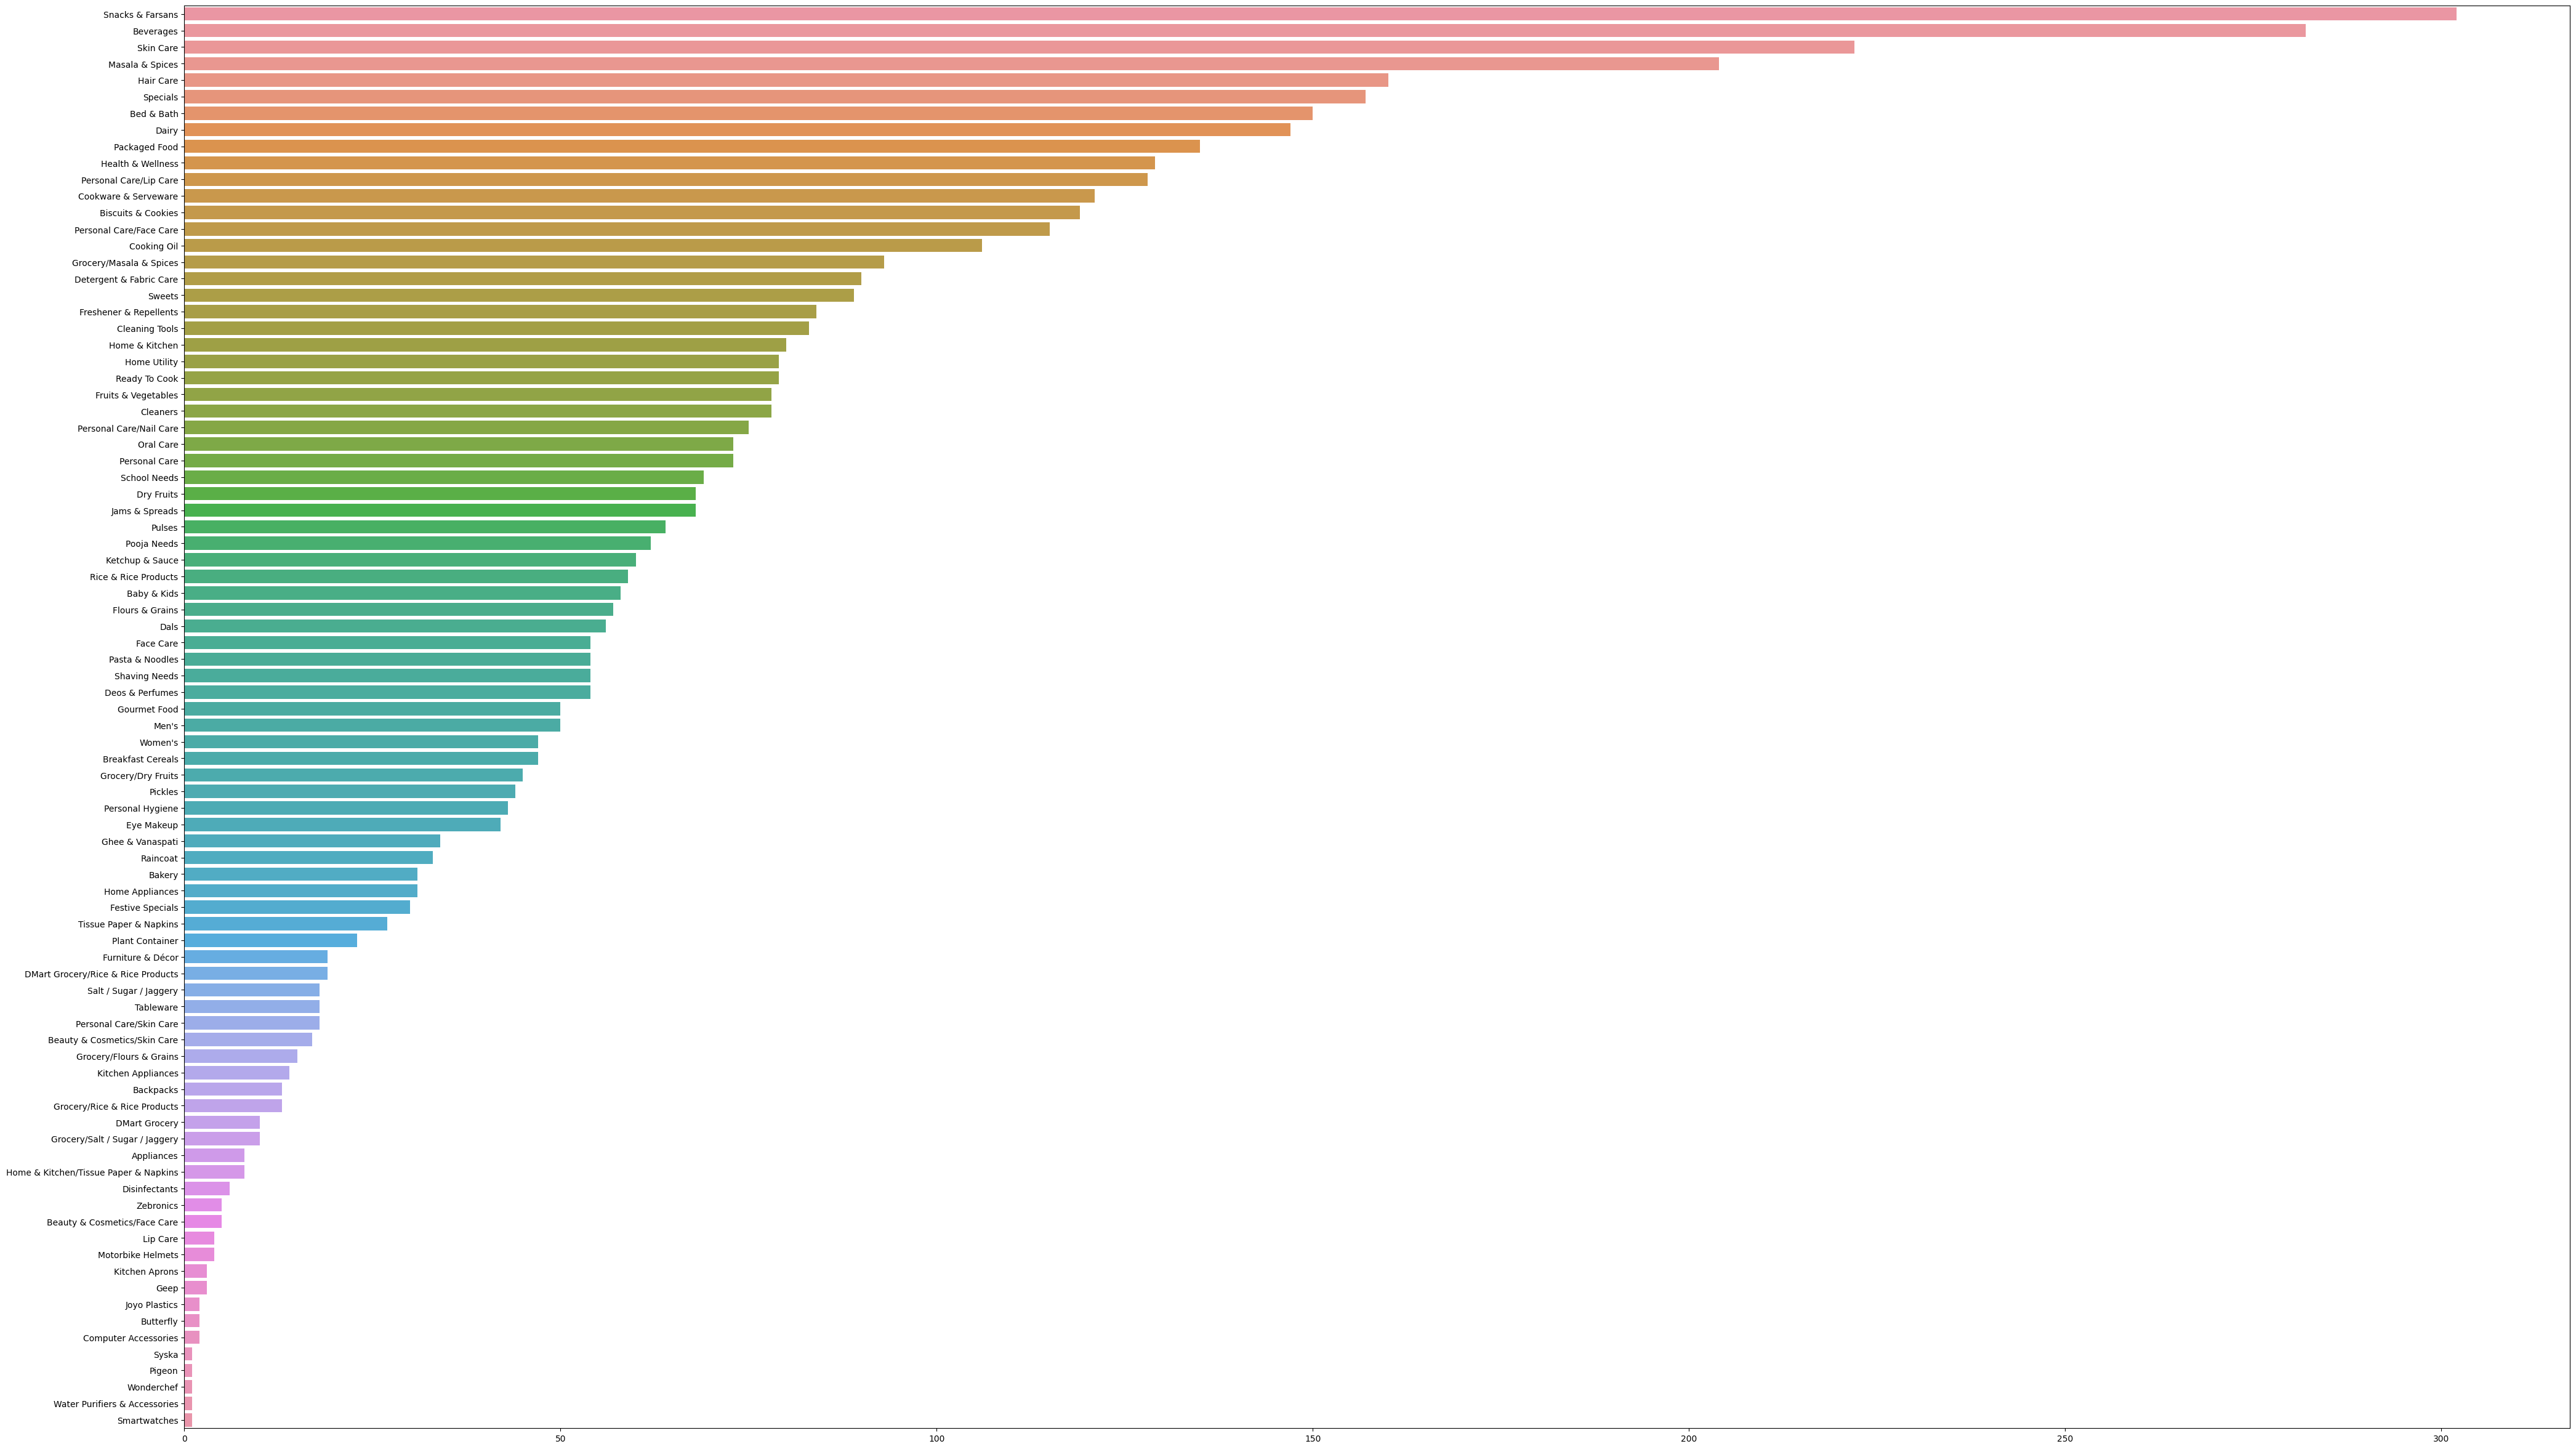

In [55]:
plt.figure(figsize=(50,30))
sns.barplot(x = data['SubCategory'].value_counts().values , y =  data['SubCategory'].value_counts().index ,  linewidth=3 )

In [58]:
data['DiscountPercent'] = (data['Price']-data['DiscountedPrice'])*100/data['Price']
data['DiscountPercent'].value_counts()

50.000000    328
20.000000    211
10.000000    155
25.000000     62
30.000000     52
            ... 
18.157895      1
21.846154      1
36.111111      1
14.444444      1
36.800000      1
Name: DiscountPercent, Length: 1909, dtype: int64

In [59]:
data.groupby('Category')['DiscountPercent'].mean().sort_values(ascending=False)

Category
Geep                             61.865712
Smartwatches                     58.343057
Butterfly                        57.467860
Zebronics                        56.750757
Backpacks                        51.732478
Pigeon                           49.958275
Wonderchef                       49.075472
Syska                            43.804756
Computer Accessories             37.614940
Joyo Plastics                    36.889328
Specials                         32.720674
Clothing & Accessories           32.361201
Appliances                       31.653101
Plant Container                  30.972572
Beauty & Cosmetics               29.153130
Home & Kitchen                   29.010845
Packaged Food                    28.679332
Personal Care                    25.930840
DMart Grocery                    24.903072
Kitchen Aprons                   24.561404
Fruits & Vegetables              22.323331
Grocery                          21.847832
Dairy & Beverages                21.408246
Ta

([<matplotlib.patches.Wedge at 0x7932335e0a60>,
 [Text(0.8948567564020493, 0.6397119551185545, 'Faces Canada'),
  Text(-0.21330485128587212, 1.079120493929159, 'Insight'),
  Text(-1.0118358323883805, 0.4314953630051119, 'Lakme'),
  Text(-1.041952639582212, -0.3526112545958523, 'Gillette'),
  Text(-0.7198631775869865, -0.8317433531771485, 'Nivea'),
  Text(-0.24085045664162122, -1.0733084633671361, 'Maybelline'),
  Text(0.2682381321333857, -1.0667934685165599, 'Colgate'),
  Text(0.6819011168723189, -0.8631401200316692, 'Lotus'),
  Text(0.9520408691786983, -0.5510155927135536, 'Himalaya'),
  Text(1.0836263030801319, -0.18908737470515088, 'Mamaearth')],
 [Text(0.48810368531020865, 0.3489337937010297, '19.76%'),
  Text(-0.11634810070138477, 0.588611178506814, '16.70%'),
  Text(-0.5519104540300257, 0.23536110709369737, '14.26%'),
  Text(-0.5683378034084793, -0.19233341159773762, '8.96%'),
  Text(-0.3926526423201744, -0.453678192642081, '7.94%'),
  Text(-0.1313729763499752, -0.585440980018437

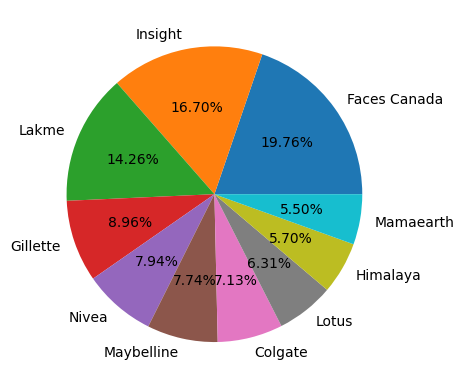

In [64]:
#Top 10 Brands
X = data[data['Category'] == 'Personal Care']
vlaues = X['Brand'].value_counts().values
Index = X['Brand'].value_counts().index
plt.pie(vlaues[:10],labels=Index[:10],autopct='%1.2f%%')

([<matplotlib.patches.Wedge at 0x79323368e740>,
 [Text(0.5344789316126459, 0.9614220049812697, 'Premia'),
  Text(-1.0534630745391564, 0.31656839795296676, 'Missing'),
  Text(-0.6926483883328154, -0.8545397651016327, 'Satyam'),
  Text(1.0298943251329445e-07, -1.0999999999999954, 'Everest'),
  Text(0.39610754000373677, -1.0262060303624163, 'Fortune'),
  Text(0.6564201874543033, -0.8826735169372975, 'Daawat'),
  Text(0.8448291229346566, -0.7044599016561972, 'India Gate'),
  Text(0.9723568162328897, -0.5143172386041891, 'Nutraj'),
  Text(1.0534630875063373, -0.3165683548013214, '24 Mantra Organic'),
  Text(1.094796470845429, -0.10686761635029596, 'Organic Tattva')],
 [Text(0.29153396269780685, 0.5244120027170561, '33.85%'),
  Text(-0.5746162224759035, 0.17267367161070912, '23.01%'),
  Text(-0.3778082118178993, -0.466112599146345, '14.60%'),
  Text(5.61760540981606e-08, -0.5999999999999974, '7.08%'),
  Text(0.2160586581838564, -0.5597487438340452, '4.65%'),
  Text(0.3580473749750745, -0.481

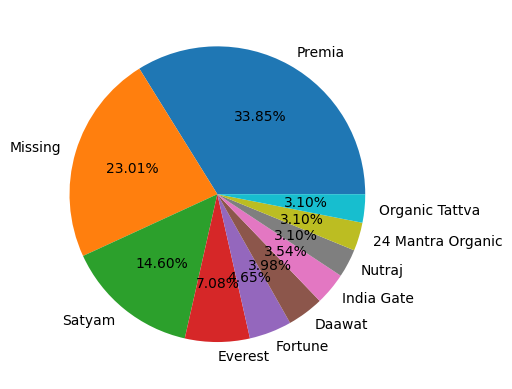

In [63]:
# Top 10 grocery brand
Y  = data[data['Category'] == 'Grocery']
V = Y['Brand'].value_counts().values
S = Y['Brand'].value_counts().index
plt.pie(V[:10],labels=S[:10],autopct='%1.2f%%')

([<matplotlib.patches.Wedge at 0x793229632a10>,
 [Text(0.808661034877338, 0.7456992226569054, 'Feather Soft'),
  Text(-0.6494426021655336, 0.8878199741459192, 'No Fuss'),
  Text(-1.0535990659130183, -0.3161154983660487, 'Macho'),
  Text(-0.2645775174445169, -1.0677072338721398, 'Clio'),
  Text(0.4978016560864326, -0.9809146299233208, 'Rupa'),
  Text(0.8323840416100331, -0.7191222477944531, 'In Shape'),
  Text(1.030927344910103, -0.3836519379810368, 'Dutch Harbor'),
  Text(1.0907820994414201, -0.1421070425354356, 'I & D'),
  Text(1.0994231228589626, -0.035620175786297614, 'Missing')],
 [Text(0.4410878372058207, 0.40674503054013017, '23.71%'),
  Text(-0.35424141936301834, 0.4842654404432286, '22.68%'),
  Text(-0.5746903995889191, -0.17242663547239018, '16.49%'),
  Text(-0.14431500951519102, -0.5823857639302581, '16.49%'),
  Text(0.271528176047145, -0.5350443435945386, '6.19%'),
  Text(0.454027659060018, -0.3922484987969744, '6.19%'),
  Text(0.5623240063146017, -0.20926469344420187, '5.15

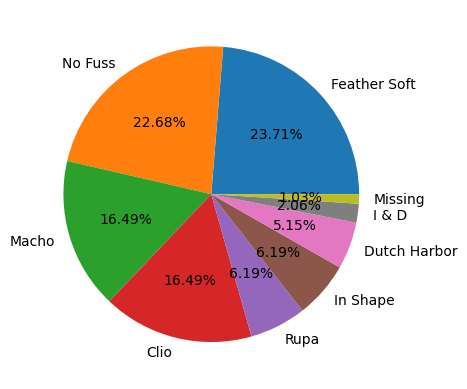

In [62]:
# Top 10 clothing brands
Z = data[data['Category'] == 'Clothing & Accessories']
d = Z['Brand'].value_counts().values
g  = Z['Brand'].value_counts().index
plt.pie(d[:10],labels=g[:10],autopct='%1.2f%%')

In [126]:
X = data['DiscountedPrice'][:11]
Y = data['Price'][:11]

In [127]:
print(X)

0     329.0
1      85.0
2     175.0
3     349.0
4     659.0
5      42.0
6      80.0
7     102.0
8      81.0
9     488.0
10     49.0
Name: DiscountedPrice, dtype: float64


In [128]:
print(Y)

0      451.0
1      109.0
2      202.0
3      599.0
4     1549.0
5       49.0
6       96.0
7      112.0
8      101.0
9      634.0
10      64.0
Name: Price, dtype: float64


In [129]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [130]:
print(X.shape, X_train.shape, X_test.shape)

(11,) (8,) (3,)


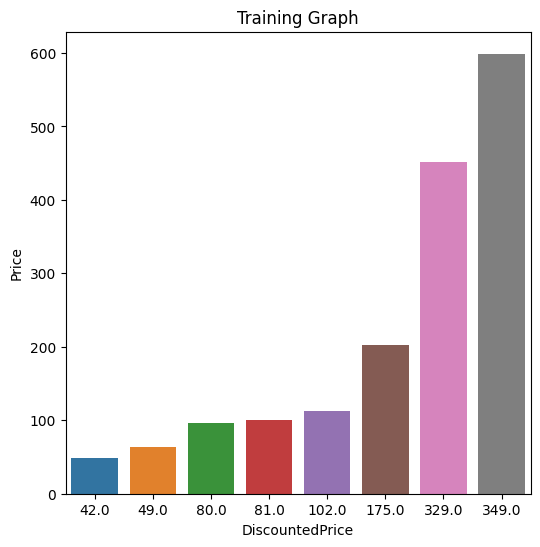

In [139]:
plt.figure(figsize=(6,6))
plt.title("Training Graph")
sns.barplot(x=X_train,y=Y_train)
plt.show()

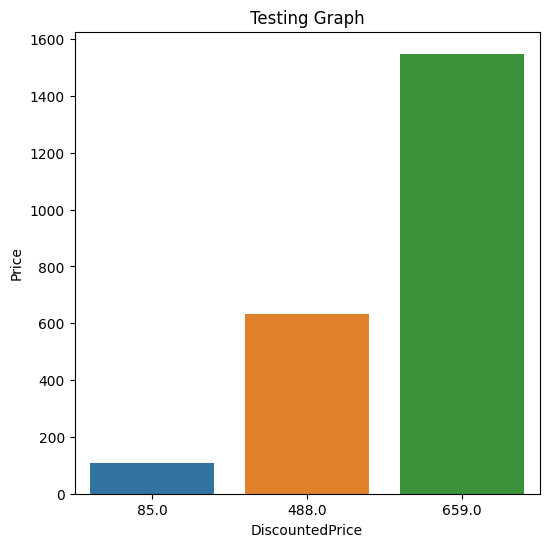

In [140]:
plt.figure(figsize=(6,6))
plt.title("Testing Graph")
sns.barplot(x=X_test,y=Y_test)
plt.show()

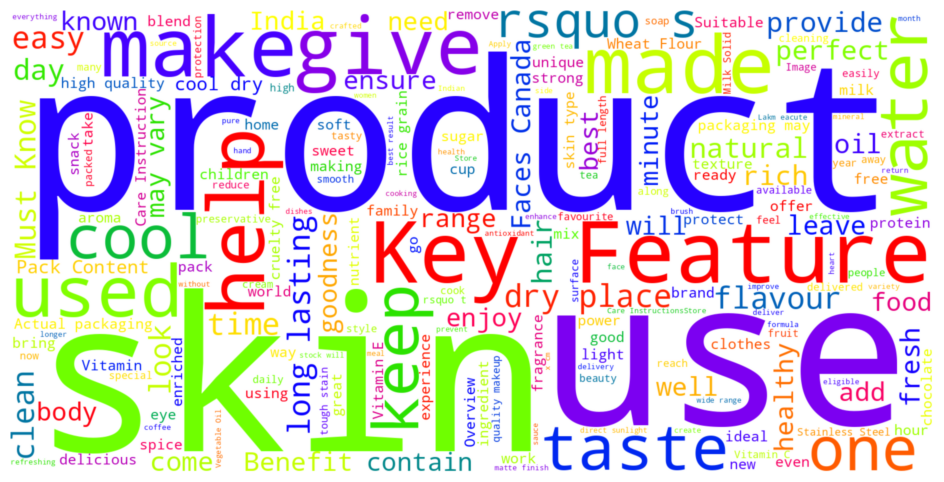

In [142]:
data['Description'] = data['Description'].fillna('No Desciption')
from wordcloud import WordCloud, STOPWORDS
text = "".join(d for d in data['Description'])
WORDCOUNT = WordCloud(width= 1600,height=800,colormap='prism',background_color = 'white').generate(text)
plt.figure(figsize = (20, 6))
plt.imshow(WORDCOUNT, interpolation="gaussian")
plt.axis("off")
plt.show()

# **Conclusion:**
**Analysis of D-Mart product and Training, Testing is done successfully. It is observed that as the price of your product is High , there is a high chances that you will get an surprising Discount for that particular product , This may also increase the sales of D-mart in future...**
✌
